In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
import numpy as np

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

import networkx as nx

from minimal.imaging import blit_rooms
from minimal.layout import LayoutGraph, NodeType
from minimal.gen import generate_plan, PlanMasks
from minimal import sample_graphs
from minimal.correction import RoomAreas
from minimal.walls import intersect_rooms, find_walls

%matplotlib inline

In [49]:
pm = PlanMasks.create_from_state(torch.load("data/plan_masks_01.pth"))

In [50]:
%%time

min_area_units = 10
rooms = []
for i, node in enumerate(pm.graph.nodes):
    if not NodeType.is_room(node):
        continue

    room = RoomAreas(node, pm.masks[i])
    room.threshold_rectangles(min_area_units)
    room.discard_small_components()
    rooms.append(room)

CPU times: user 1.17 s, sys: 1.51 ms, total: 1.17 s
Wall time: 1.17 s


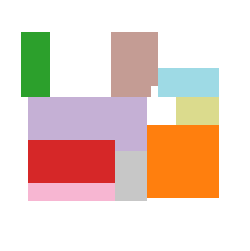

In [51]:
room_index_mask = sum(room.to_mask() * (i + 2) for i, room in enumerate(rooms))
room_index_mask.shape

plt.figure(figsize=(3,3))
cmap = ListedColormap(['white', 'black', *plt.get_cmap('tab20').colors])
plt.axis("off")
plt.imshow(room_index_mask, cmap=cmap)

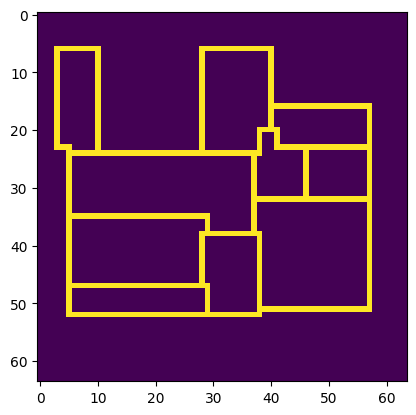

In [52]:
all_walls = find_walls(rooms)
plt.imshow(all_walls)

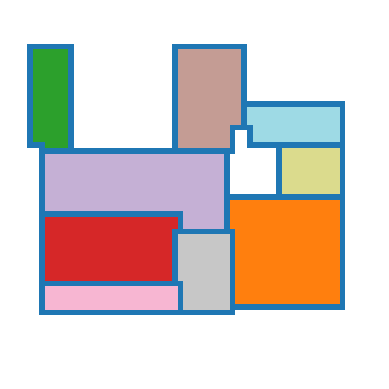

In [53]:
rooms_with_walls = room_index_mask.clone()
rooms_with_walls[torch.where(all_walls == 1)] = 1

plt.axis("off")
plt.imshow(rooms_with_walls, cmap=cmap)